<center><font size=10>Pseudo Spectral Method<\font><\center>

In [1]:
from IPython.display import display,Math,Latex, YouTubeVideo
import numpy as np

# Motivation

Pseudo-Spectral has Fourier Transformation algorithm at it's heart so I wanted you to first watch this video on Fourier Transformation

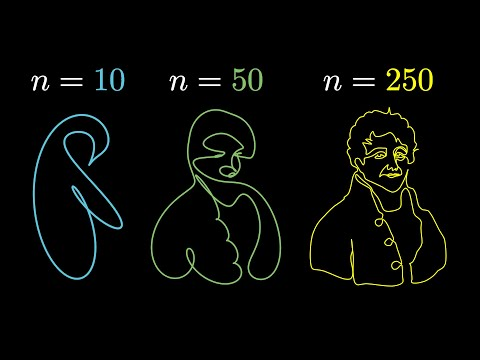

In [2]:
YouTubeVideo(id = 'r6sGWTCMz2k',height=300, weidth=300)

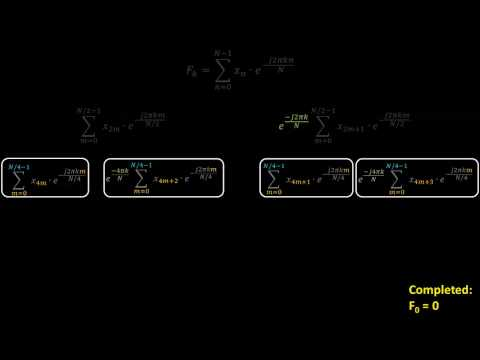

In [3]:
YouTubeVideo(id = 'htCj9exbGo0',height=300, weidth=300)

# Fourier Galerkin(FG)


Here we approximate a function in the form of summation of periodic function of different frequency



# $u=\sum_{k=-\infty}^\infty\hat{u}e^{ikx} \approx U = \sum_{k=-\frac{N}{2}}^\frac N2 a_ke^{ikx} $


#### A basic example of Fourier Transformation to demonstrate level of accuracy it have.
For that we will first define some randome varible and take the Fourier transformation and then take inverse Fourier transformation of that and let's see what the result it,Whether it is same of what variable we have or different form it 

In [4]:
import matplotlib.pyplot as plt
import scipy.fftpack as sci
U=10*np.random.rand(1,10)      #declearing random 1-D array of size 10
U                              #printing U

array([[1.03572358, 0.65098381, 3.2418263 , 2.5213459 , 2.74485863,
        3.94302589, 4.5624001 , 6.83554804, 8.02549998, 5.88172476]])

In [5]:
U_fourier=sci.fft(U)              #taking fourier transform
U_fourier                         #printing Uinv

array([[39.44293699 -0.j        , -2.94357049+12.79547053j,
        -7.42981009 +3.52209404j, -4.21352537 +1.3557177j ,
         0.15521526 +1.55973434j, -0.2223198  -0.j        ,
         0.15521526 -1.55973434j, -4.21352537 -1.3557177j ,
        -7.42981009 -3.52209404j, -2.94357049-12.79547053j]])

In [6]:
U_restored =(sci.ifft(U_fourier)).real      #taking inverse fourier transform

In [7]:
U_restored

array([[1.03572358, 0.65098381, 3.2418263 , 2.5213459 , 2.74485863,
        3.94302589, 4.5624001 , 6.83554804, 8.02549998, 5.88172476]])

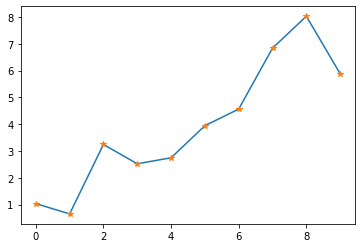

In [8]:
plt.plot(U_restored[0])
plt.plot(U[0],'*')

In [9]:
Error=U-U_restored                #error calculation for accuracy mesurement
Error.max(),Error.min()          #maximum and minimum error

(8.881784197001252e-16, -1.7763568394002505e-15)

So we can see that after taking inverse of fourior transformation of some random variables which is not governed by any function they are juct random we get error tending to zero

## Now we will sove burgers' equation using Pseuso spectral methode

## Burgers' Equation 


# $$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}=\nu \frac{\partial^2 u}{\partial x^2} $$

In [18]:
N = 1024
𝑡_min = 0.00
𝑡_max = 2.00
d𝑡 = 0.000001
𝜈 = 0.000
a = 2*np.pi
x = np.linspace(0,a,1024)
x

array([0.00000000e+00, 6.14192112e-03, 1.22838422e-02, ...,
       6.27090146e+00, 6.27704339e+00, 6.28318531e+00])

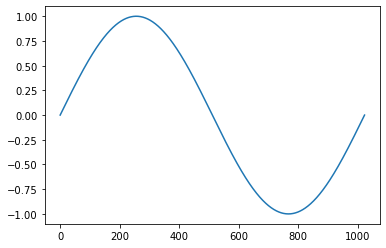

In [19]:
UX=np.sin(x)
plt.plot(UX)

In [20]:
duk=np.ones(1024,dtype=complex)
dduk=np.ones(1024,dtype=complex)
force_u_n=np.zeros(1024,dtype=float)
ddux = np.ones(1024)
dux = np.ones(1024)

C:\Users\My Account\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


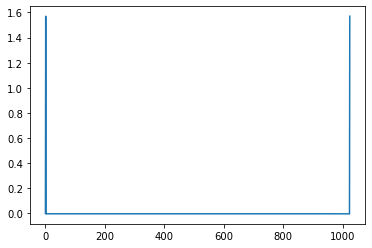

In [21]:
plt.plot(sci.fft(UX))

<ipython-input-22-d70f1047f7be>:11: RuntimeWarning: overflow encountered in double_scalars
  force_u_n[i]=UX[i]*dux[i]
<ipython-input-22-d70f1047f7be>:15: RuntimeWarning: invalid value encountered in double_scalars
  UX[i]=UX[i]+ d𝑡* ((3.0/2.0)*force_u_n[i]-(1.0/2.0)*force_u_o[i])


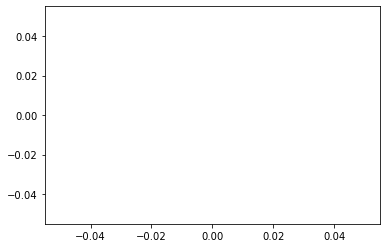

In [22]:
for o in range(1,17000):
    Uk=sci.fft(UX)
    c=complex(0,1)
    for i in range(0,N):
        k=2.0*(np.pi)*float(i)/a
        duk[i]=c*k*Uk[i]
    dux=(sci.ifft(duk)).real
    for i in range(0,N):
        dux[i]=dux[i]
        ddux[i]=ddux[i]
        force_u_n[i]=UX[i]*dux[i]
        if(o==1):
            UX[i]=UX[i]+ d𝑡* force_u_n[i]
        else:
            UX[i]=UX[i]+ d𝑡* ((3.0/2.0)*force_u_n[i]-(1.0/2.0)*force_u_o[i])
    force_u_o=force_u_n

plt.scatter(x,UX,label= "stars", color= "blue",
            marker= ".", s=1)

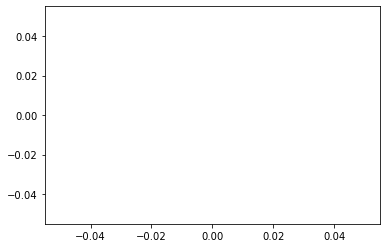

In [23]:
plt.plot(UX)

In [16]:
UX_restored=sci.ifft(Uk).real
UX_restored

array([nan, nan, nan, ..., nan, nan, nan])

NameError: name 'UX2' is not defined

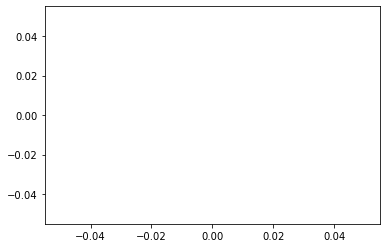

In [17]:
plt.plot(UX)
plt.plot(UX2)


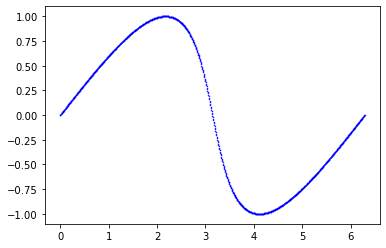

In [69]:
# # proposed correction subjected to verification
for o in range(1,6000):
    Uk=sci.fft(UX)
    c=complex(0,1)
    for i in range(0,N):
#         k=2.0*(np.pi)*float(i)/a
        if i <= N/2:
            k=2.00*(np.pi)*float(i)/a
        else:
            k=2.00*(np.pi)*float(i-N)/a
        duk[i]=c*k*Uk[i]
    dux=(sci.ifft(duk)).real
    for i in range(0,N):
#         dux[i]=dux[i]/float(N)
#         ddux[i]=ddux[i]/float(N)
        force_u_n[i]=-UX[i]*dux[i]
        if(o==1):
            UX[i]=UX[i]+dt*force_u_n[i]
        else:
            UX[i]=UX[i]+dt*((3.0/2.0)*force_u_n[i]-(1.0/2.0)*force_u_o[i])
    force_u_o=force_u_n

plt.scatter(x,UX,label= "stars", color= "blue",
            marker= ".", s=1)